In [1]:
import os
import glob

import matplotlib.pyplot as plt
import numpy as np
import tqdm

import src

### Prepreocessing sun3d

In [2]:
sun3d_scenes = src.threeDMatch.get_sun3d_scenes(split="test")
src.threeDMatch.preprocess_scenes(sun3d_scenes, "data/preprocessed-sun3d")

 17%|█▋        | 1/6 [03:44<18:41, 224.29s/it]

380


 33%|███▎      | 2/6 [04:27<11:19, 169.85s/it]

1259


 50%|█████     | 3/6 [09:23<10:23, 207.83s/it]

9179


 67%|██████▋   | 4/6 [10:35<05:34, 167.13s/it]

3897


 83%|████████▎ | 5/6 [11:15<02:08, 128.83s/it]

2458


100%|██████████| 6/6 [16:26<00:00, 164.48s/it]

1069


In [ ]:
sun3d_scenes = src.threeDMatch.get_sun3d_scenes(split="train")
src.threeDMatch.preprocess_scenes(sun3d_scenes, "data/preprocessed-sun3d")

### Testing the speed of the shapenet dataset 

In [6]:
train_models = src.shapenet.get_shapenet_data("train")
clouds = []
for i in tqdm.tqdm(range(20)):
    model_path = train_models[np.random.randint(len(train_models))]
    cloud = src.shapenet.sample_points(model_path, nb=100000)
    clouds.append(cloud)

100%|██████████| 20/20 [00:01<00:00, 12.71it/s]


In [7]:
extracted = []
extractor = src.dataset.PPFPatchExtractor(nb_patches=2044, nb_points=1024)
for cloud in tqdm.tqdm(clouds):
    ppf, M = extractor.make_example(cloud)
    extracted.append((ppf,M))

100%|██████████| 20/20 [00:22<00:00,  1.13s/it]


In [8]:
loss_func = src.loss.N_tuple_loss(extractor.nb_patches)
for ppf, M in tqdm.tqdm(extracted):
    pred = np.random.random((1, extractor.nb_patches, 13)).astype(np.float32)
    res = loss_func(M[np.newaxis,...],pred)

100%|██████████| 20/20 [00:00<00:00, 92.11it/s]


### Visualising sun 3d

In [27]:
scene_path = src.threeDMatch.get_sun3d_scenes(split="test")[0]
scene_frames = glob.glob(os.path.join(scene_path, "seq-01", "*.depth.png"))

In [29]:
scene_path

'data/rgbd-datasets/sun3d-hotel_uc-scan3/'

100%|██████████| 100/100 [00:03<00:00, 30.64it/s]


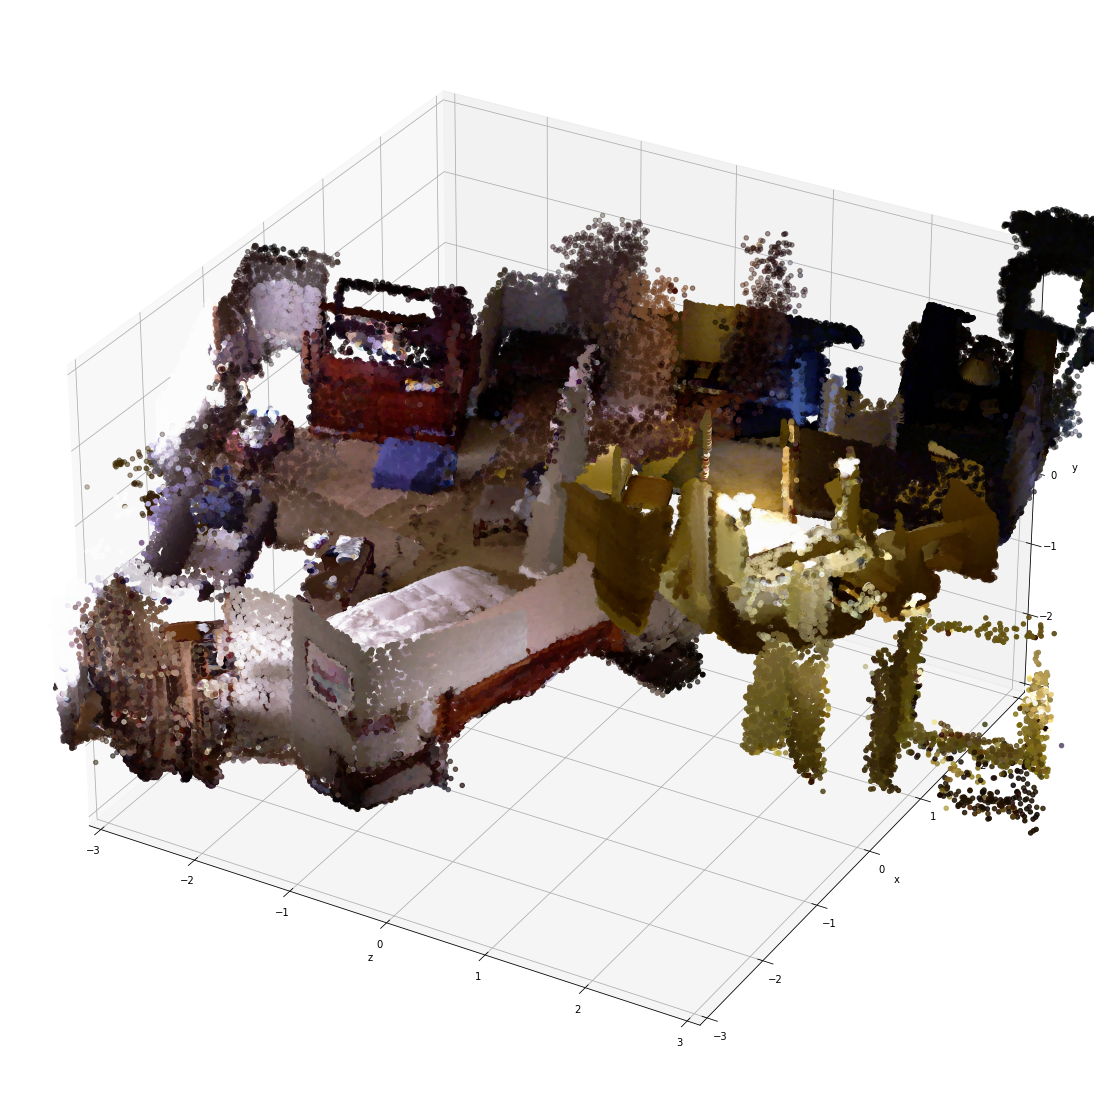

In [28]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')

lim = (-3,3)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_zlim(lim) 

ax.set_xlabel("z")
ax.set_ylabel("x")
ax.set_zlabel("y")

def plot_cloud(ax, cloud, colors=None):
    xs = cloud[:,2]
    ys = cloud[:,0]
    zs = cloud[:,1]
    if colors is not None:
        colors = colors/256
    ax.scatter(xs, ys, zs, color=colors)
 
for idx in tqdm.tqdm(range(0,100)):
    coord, colors = src.threeDMatch.get_cloud(scene_frames[idx], True)
    sample = np.random.choice(len(coord), 10000, replace=False)
    plot_cloud(ax, coord[sample], colors[sample])

In [26]:
s="""-rw-rw-r-- 1 leo leo 3063501569 déc.   1  2016 ./sun3d-brown_bm_1-brown_bm_1.zip
-rw-rw-r-- 1 leo leo 1534650583 déc.   1  2016 ./sun3d-brown_bm_4-brown_bm_4.zip
-rw-rw-r-- 1 leo leo 1323104552 déc.   1  2016 ./sun3d-brown_cogsci_1-brown_cogsci_1.zip
-rw-rw-r-- 1 leo leo 2449010477 déc.   1  2016 ./sun3d-brown_cs_2-brown_cs2.zip
-rw-rw-r-- 1 leo leo 1627996477 déc.   1  2016 ./sun3d-brown_cs_3-brown_cs3.zip
-rw-rw-r-- 1 leo leo  415641380 déc.   1  2016 ./sun3d-harvard_c11-hv_c11_2.zip
-rw-rw-r-- 1 leo leo  927978810 déc.   1  2016 ./sun3d-harvard_c3-hv_c3_1.zip
-rw-rw-r-- 1 leo leo  939014194 déc.   1  2016 ./sun3d-harvard_c5-hv_c5_1.zip
-rw-rw-r-- 1 leo leo  697582737 déc.   1  2016 ./sun3d-harvard_c6-hv_c6_1.zip
-rw-rw-r-- 1 leo leo  461883331 déc.   1  2016 ./sun3d-harvard_c8-hv_c8_3.zip
-rw-rw-r-- 1 leo leo 7249616621 déc.   1  2016 ./sun3d-home_at-home_at_scan1_2013_jan_1.zip
-rw-rw-r-- 1 leo leo 7595214049 déc.   1  2016 ./sun3d-home_bksh-home_bksh_oct_30_2012_scan2_erika.zip
-rw-rw-r-- 1 leo leo 6638484576 déc.   1  2016 ./sun3d-home_md-home_md_scan9_2012_sep_30.zip
-rw-rw-r-- 1 leo leo 3209034333 déc.   1  2016 ./sun3d-hotel_nips2012-nips_4.zip
-rw-rw-r-- 1 leo leo 4861494804 déc.   1  2016 ./sun3d-hotel_sf-scan1.zip
-rw-rw-r-- 1 leo leo 4906263991 déc.   1  2016 ./sun3d-hotel_uc-scan3.zip
-rw-rw-r-- 1 leo leo 2616484035 déc.   1  2016 ./sun3d-hotel_umd-maryland_hotel1.zip
-rw-rw-r-- 1 leo leo  852966798 déc.   1  2016 ./sun3d-hotel_umd-maryland_hotel3.zip
-rw-rw-r-- 1 leo leo 2797588697 déc.   1  2016 ./sun3d-mit_32_d507-d507_2.zip
-rw-rw-r-- 1 leo leo 4722634966 déc.   1  2016 ./sun3d-mit_46_ted_lab1-ted_lab_2.zip
-rw-rw-r-- 1 leo leo 5706006217 déc.   1  2016 ./sun3d-mit_76_417-76-417b.zip
-rw-rw-r-- 1 leo leo 1507536817 déc.   1  2016 ./sun3d-mit_76_studyroom-76-1studyroom2.zip
-rw-rw-r-- 1 leo leo 1387876110 déc.   1  2016 ./sun3d-mit_dorm_next_sj-dorm_next_sj_oct_30_2012_scan1_erika.zip
-rw-rw-r-- 1 leo leo  888371558 déc.   1  2016 ./sun3d-mit_lab_hj-lab_hj_tea_nov_2_2012_scan1_erika.zip
-rw-rw-r-- 1 leo leo 4531669424 déc.   2  2016 ./sun3d-mit_w20_athena-sc_athena_oct_29_2012_scan1_erika.zip"""
total = 0
for l in s.split("\n"):
    total += int([k for k in l.split(" ") if len(k)][4])
total / 1e9

72.911607106